This notebook explores the dorothea_smaller dataset to try and find some sort of pattern

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from sklearn import datasets, decomposition, cluster, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage  
import seaborn as sns

In [2]:
#read data from csv
data = pd.read_csv("datasets/dorothea_smaller.csv")
print(data.head())

   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0           1           0           0           0           0           0   
1           2           0           0           0           0           0   
2           3           0           0           0           0           0   
3           4           0           0           0           0           0   
4           5           0           0           0           0           0   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9   ...     Unnamed: 9992  \
0           0           0           0           0   ...                 0   
1           0           0           0           0   ...                 0   
2           0           0           0           0   ...                 0   
3           0           0           0           0   ...                 0   
4           0           0           0           0   ...                 0   

   Unnamed: 9993  Unnamed: 9994  Unnamed: 9995  Unnamed: 9996  Unnamed: 99

Create a dataframe and create a variable of the train.y data

In [3]:
data_x = pd.DataFrame(data)
data_y = data_x.iloc[:,10001]
data_x.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 9992,Unnamed: 9993,Unnamed: 9994,Unnamed: 9995,Unnamed: 9996,Unnamed: 9997,Unnamed: 9998,Unnamed: 9999,Unnamed: 10000,y.train
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


This next bit creates a correlation heatmap of the first 200 columns... to not much success

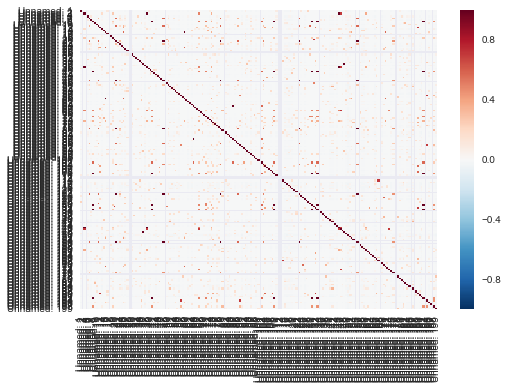

In [4]:
data_x_hm = data_x.iloc[:,1:200]
sns.heatmap(data_x_hm.corr())

The next two sections remove the columns with purely 0 values and remove any duplicate rows. the drop_duplicates function shows that there are no duplicates within dorothea_smaller

In [5]:
#remove first and last columns
data_x1 = data_x.iloc[:,1:10001]
#removing columns with purely 0 values
data_x1 = data_x1.loc[:, (data_x != 0).any(axis=0)]

In [6]:
#removing duplicate rows
data_x1 = data_x1.drop_duplicates()
data_x1

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 9988,Unnamed: 9989,Unnamed: 9990,Unnamed: 9992,Unnamed: 9993,Unnamed: 9994,Unnamed: 9996,Unnamed: 9998,Unnamed: 9999,Unnamed: 10000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PCA Analysis
The next section creates a PCA and applies it to the data set. the variance ratio shows how much variance is captured

In [7]:
data_pca = decomposition.PCA(n_components=300)# create a pca
principalComponents = data_pca.fit_transform(data_x1) # fit the pca to this dataset
principalDf = pd.DataFrame(data = principalComponents)# save the output 

In [8]:
# variance captured
sum(data_pca.explained_variance_ratio_)

0.5991322777610781

# Machine learning using Keras

In [9]:
# Turn x and y data into matrices for keras
from keras.utils import to_categorical
principalDf
labels = pd.DataFrame(data_y).as_matrix()
labels = labels.flatten()
labels = to_categorical(labels)

features = pd.DataFrame(principalDf).as_matrix()

Using TensorFlow backend.


In [14]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras import optimizers

# Train / Test data split
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.33, random_state=2)

# Learning rate
learning_rate = 0.01

# Number of training epochs
num_epochs = 100

# Network architecture parameters
num_features = len(train_x[0])
num_classes = len(train_y[0])
num_hidden_nodes = 10

# With sequential we can just add layers to the network
model = Sequential()
model.add(Dense(num_hidden_nodes, input_dim=num_features, activation='relu'))
model.add(Dense(num_hidden_nodes, activation='relu'))
model.add(Dense(num_hidden_nodes, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# The fit function returns a dictionary of the training and evaluation losses and accuracies
metrics = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=num_epochs, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                3010      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 22        
Total params: 3,252
Trainable params: 3,252
Non-trainable params: 0
_________________________________________________________________
Train on 536 samples, validate on 264 samples
Epoch 1/100
 - 0s - loss: 0.7615 - acc: 0.3563 - val_loss: 0.6784 - val_acc: 0.7083
Epoch 2/100
 - 0s - loss: 0.6058 - acc: 0.8769 - val_loss: 0.5610 - val_acc: 0.9432
Epoch 3/100
 - 0s - loss: 0.5105 - acc: 0.9832 - val_loss:

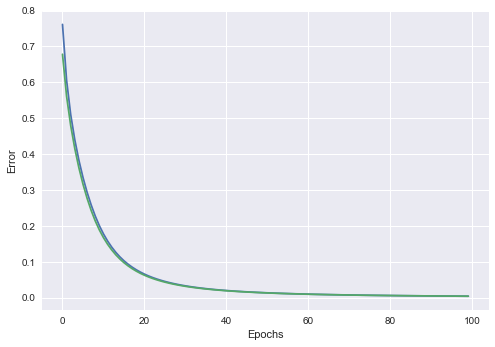

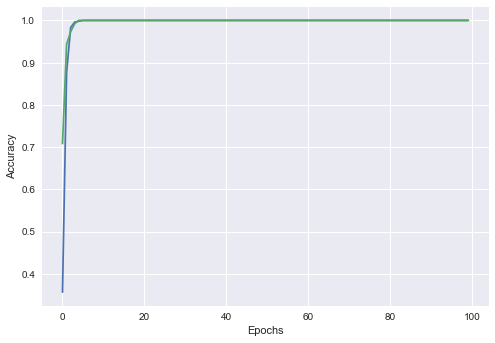

264/264 [==============================] - 0s 0us/step
Evaluation: Loss=0.004 Accuracy=1.0


In [15]:
# Plot the error chart
plt.plot(metrics.history['loss'])
plt.plot(metrics.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Plot the accuracy chart
plt.plot(metrics.history['acc'])
plt.plot(metrics.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

eval_metrics = model.evaluate(test_x, test_y)
print("Evaluation: Loss=" + str(round(eval_metrics[0], 3)) + " Accuracy=" + str(round(eval_metrics[1], 3)))
